In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

import pandas as pd
from utils.configuration import *

## Graph & Model Specifics

In [2]:
experiment_name = "create_configration_test"      ## <--- set experiment name
LOG_DIR="/home/bule/TramDag/dev_experiment_logs"  ## <--- set log directory

In [3]:
EXPERIMENT_DIR = os.path.join(LOG_DIR, experiment_name)
DATA_PATH = EXPERIMENT_DIR # <----------- change to different source if needed
CONF_DICT_PATH = os.path.join(EXPERIMENT_DIR, f"configuration.json")

In [4]:
os.makedirs(EXPERIMENT_DIR,exist_ok=True)
# check if configration dict already exists if not create:
if os.path.exists(CONF_DICT_PATH):
    configuration_dict=load_configuration_dict(CONF_DICT_PATH)
    print(f"Loaded existing configuration from {CONF_DICT_PATH}")
else:
    configuration_dict=create_and_write_new_configuration_dict(experiment_name,CONF_DICT_PATH,EXPERIMENT_DIR,DATA_PATH,LOG_DIR)
    print(f"Created new configuration file at {CONF_DICT_PATH}")

Created new configuration file at /home/bule/TramDag/dev_experiment_logs/create_configration_test/configuration.json


In [ ]:
# here you need to specify which varibles are in the graph and what type they are (continous or ordinal) for the model builder 
data_type= {'x1':'ordinal_Xn_Yo',
            'x2':'ordinal_Xc_Yc',
            'x3':'ordinal_Xn_Yo'} 

write_data_type_to_configuration(data_type, CONF_DICT_PATH)

Variable 'x1' is modeled as an ordinal   variable. As PREDICTOR: OneHot and TARGET: OneHot.
Variable 'x2' is modeled as an ordinal   variable. As PREDICTOR: continous and TARGET: continous.
Variable 'x3' is modeled as an ordinal   variable. As PREDICTOR: OneHot and TARGET: continous.
Variable 'x4' is modeled as a continuous variable. for target and predictor.
Configuration updated successfully.


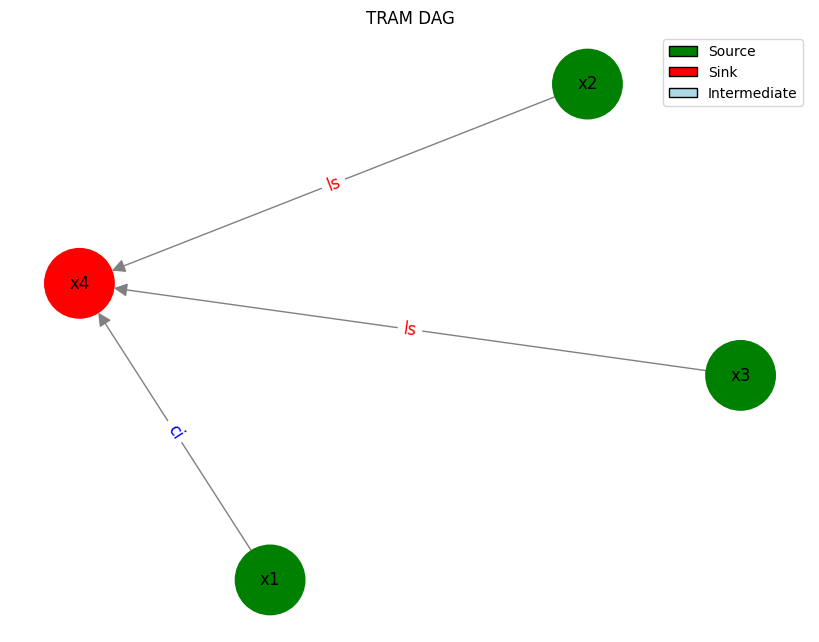

In [8]:
interactive_adj_matrix(CONF_DICT_PATH,seed=13)

In [ ]:
interactive_nn_names_matrix(CONF_DICT_PATH, seed=5)

## Data Specific

In [ ]:
## Use data here to compute quantiles for normalization and write them to the config file
# 1. Generate synthetic blob data
X, _ = make_blobs(n_samples=1000,centers=4, n_features=4)
df = pd.DataFrame(X, columns=["x1", "x2", "x3", "x4"])

# 1. Split the data
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# 2. Compute quantiles from training data
quantiles = train_df.quantile([0.05, 0.95])
min_vals = quantiles.loc[0.05]
max_vals = quantiles.loc[0.95]

In [ ]:

levels_dict=create_levels_dict(df,data_type)

write_nodes_information_to_configuration(CONF_DICT_PATH, min_vals, max_vals,levels_dict)
